In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For show all columns and full value of columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth',300)

# Colors
color_pal = sns.colpor_palette()
plt.style.use('ggplot')

## **Hypothesis Testing**


#### Hypothesis testing is a technique for **evaluating a theory using data.**
#### The hypothesis is the Researcher’s **initial belief about the situation before the study.**

#### The commonly accepted fact is known as the null hypothesis while the opposite is the alternate hypothesis. The researcher’s task is to reject, nullify, or disprove the null hypothesis. In fact, the word “null” is meant to imply that it’s a commonly accepted fact that researchers work to nullify (zero effect).

#### For example, if we consider a study about cell phones and cancer risk, we might have the following hypothesis:

#### **Null hypothesis: “Cell phones have no effect on cancer risk.”**
#### **Alternative hypothesis (the one under investigation): “Cell phones affect the risk of cancer.”**

#### The hypothesis that there is **no difference**between things is called **Null Hypothesis.**

>#### There are **three types of tests, and the phrasing of the alternative hypothesis** determines which type we should use.
#### If we are checking for a **difference compared to a hypothesized value**, we look for **extreme values in either tail and perform a two-tailed test**. 
#### If the **alternative hypothesis uses language like "less" or "fewer", we perform a left-tailed test**
#### **Words like "greater" or "exceeds" correspond to a right-tailed test.** 

>### **Statistical Test**
#### The output of a Statistical Test is a **Decision to (Reject or Fail to Reject) Null Hypothesis.**
#### A Statistical Test Need 3 thins:
#### **1. Data**
#### **2. Its needs a Null or Primary Hypothesis to Reject or Fail to Reject.**(Cell phones have no effect on cancer risk)
#### **3. Its needs an Alternative Hypothesis**.(Cell phones affect the risk of cancer)

## TEST ONE

>#### A hypothesize that the mean annual compensation of the population of data scientists is 110,000 dollars.

In [9]:
df_stack_overflow = pd.read_feather('data/stack_overflow.feather')
df_stack_overflow.head()

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,currency_desc,currency_symbol,database_desire_next_year,database_worked_with,dev_type,ed_level,employment,ethnicity,gender,job_factors,job_sat,job_seek,language_desire_next_year,language_worked_with,misc_tech_desire_next_year,misc_tech_worked_with,new_collab_tools_desire_next_year,new_collab_tools_worked_with,new_dev_ops,new_dev_ops_impt,new_ed_impt,new_job_hunt,new_job_hunt_research,new_learn,new_off_topic,new_onboard_good,new_other_comms,new_overtime,new_purchase_research,purple_link,newso_sites,new_stuck,op_sys,org_size,platform_desire_next_year,platform_worked_with,purchase_what,sexuality,so_account,so_comm,so_part_freq,so_visit_freq,survey_ease,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write code sometimes as part of my work",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,Pound sterling,GBP,Microsoft SQL Server;MongoDB;SQLite,IBM DB2;Microsoft SQL Server;MongoDB;SQLite,Data or business analyst;Data scientist or machine learning specialist,Some college/university study without earning a degree,Employed full-time,White or of European descent,Man,Flex time or a flexible schedule;Office environment or company culture;Opportunities for professional development,Slightly satisfied,"I’m not actively looking, but I am open to new opportunities",C#;Go;HTML/CSS;JavaScript;Python;SQL,C#;Go;HTML/CSS;Java;JavaScript;Python;R;SQL,Keras;Node.js;Pandas;TensorFlow,Node.js;Pandas,Confluence;Jira;Github;Slack;Trello,Confluence;Jira;Github;Slack;Trello,Not sure,Neutral,Somewhat important,Having a bad day (or week or month) at work;Curious about other opportunities;Wanting to work with new technologies;Growth or leadership opportunities,None,Every few months,No,Yes,No,Sometimes: 1-2 days per month but less than weekly,None,"Hello, old friend",Stack Overflow (public Q&A for anyone who codes);Stack Exchange (public Q&A for a variety of topics),Visit Stack Overflow;Go for a walk or other physical activity;Watch help / tutorial videos;Do other work and come back later,Windows,"1,000 to 4,999 employees",Linux;MacOS;Windows,MacOS;Windows,I have little or no influence,Straight / Heterosexual,Yes,"Yes, somewhat",Less than once per month or monthly,Multiple times per day,Easy,Appropriate in length,No,"Computer science, computer engineering, or software engineering",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,Pound sterling,GBP,PostgreSQL;SQLite,Microsoft SQL Server;Oracle;PostgreSQL;SQLite,"Data scientist or machine learning specialist;Developer, back-end;Developer, QA or test;Engineer, data;Scientist","Other doctoral degree (Ph.D., Ed.D., etc.)",Employed full-time,White or of European descent,Man,Remote work options;How widely used or impactful my work output would be;Opportunities for professional development,Very satisfied,"I’m not actively looking, but I am open to new opportunities",Bash/Shell/PowerShell;Java;Python;SQL,Bash/Shell/PowerShell;C#;Java;JavaScript;Python;Ruby;SQL,Pandas,.NET;.NET Core,Github;Gitlab,"Confluence;Jira;Github;Gitlab;Microsoft Azure;Google Suite (Docs, Meet, etc)",Yes,Neutral,Not at all important/not necessary,Just because;Having a bad day (or week or month) at work;Curious about other opportunities;Wanting to work with new technologies;Looking to relocate,"Read company media, such as employee blogs or company culture videos;Company reviews from third party sites (e.g. Glassdoor, Blind);Personal network - friends or family;Directly asking current or past employees at the company",Once a year,No,Onboarding? What onboarding?,Yes,Occasionally: 1-2 days per quarter but less than monthly,Start a free trial;Ask 

In [10]:
df_stack_overflow['converted_comp'].mean()

119574.71738168952

#### The mean is not meaning full enough.

### Before we Hypothesis the value, we need to **Standardize Value** the values.
#### A common way to do that is ```subtract mean from value and divide std``` $Standardize Value$ = ($value$ - $\mu$)/$\sigma$

### What is **Z-Score**?

#### A **Z-score** is a numerical measurement that **describes a value's relationship to the mean** of a group of values. **Z-score is measured in terms of standard deviations from the mean.**
>#### **If a Z-score is 0, it indicates that the data point's score is identical to the mean score.**

### $z.Score$ = ($sample.stat$ - $hypothesis.parameter.value$)/$standard.error$

In [4]:
sample_stat = df_stack_overflow['converted_comp'].sample(frac=1, replace=True).mean()
hypothesis_parameter_value = 110000


### What is **StandardError**?

#### Standard deviation of the mean is called **StandardError**.

### **Standard Deviation** vs **Standard Error**

|Std|St Error|
|------------------------|--------------------------------------|
|The standard deviation quantifies the variation within a set of measurements.|The standard error quantifies the variation in means from multiple set of measurements|

### Bootstrap Distribution

In [5]:
def bootstrap_distribution(sample_size, column_name):
    x = []
    if type(column_name) == list:
        for i in range(sample_size):
            x.append((df_stack_overflow[column_name[0]] == column_name[1]).sample(frac=1, replace=True).mean())
    elif type(column_name) == str:
        for i in range(sample_size):
            x.append(df_stack_overflow[column_name].sample(frac=1, replace=True).mean())
    return x

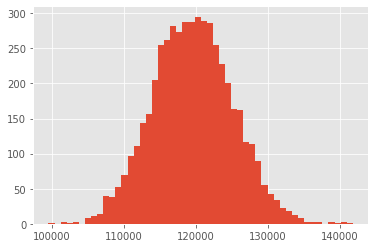

In [6]:
bootstrap_dist = bootstrap_distribution(5000, 'converted_comp')
plt.hist(bootstrap_dist, bins=50)
plt.show()

In [7]:
std_error = np.std(bootstrap_dist)

In [8]:
z_score = (sample_stat - hypothesis_parameter_value)/std_error
print(z_score)

1.7638935573963894


### The Z Score above changes as the the sample size and changes.

## TEST TWO

#### Suppose **previous research suggests that 35 percent of software developers programmed as children**.
#### This raises a question answerable with our dataset.
- Does our sample provide evidence that a greater proportion of data scientists started programming as children?

#### A hypothesis is a statement about a population parameter. We don't know the true value of this population parameter; we can only make inferences about it from the data.
#### Hypothesis tests compare two competing hypotheses. These two hypotheses are the 
- **Null Hypothesis:, representing the existing idea,**  denoted $H_0$
- **Alternative Hypothesis:, representing a new idea** that challenges the existing one. denoted $H_A$

#### Here, the **null hypothesis** is that the proportion of data scientists that started programming as children follows the research on software developers, at 35 percent. 
#### The **alternative hypothesis** is that the percentage is greater than 35.

### Rather than saying we accept the alternative hypothesis, it is **convention to refer to rejecting the null hypothesis, or failing to reject the null hypothesis.** 

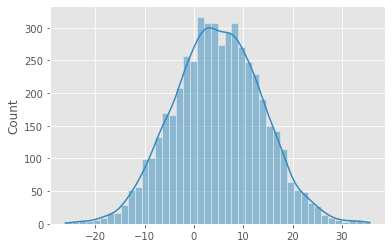

In [9]:
samples = sp.stats.norm.rvs(loc=5, scale=3 ** 2, size=5000)
sns.histplot(samples, kde=True)
plt.show()

#### The **tails of a distribution are the left and right edges of its PDF**. 
>#### Hypothesis tests **determine whether the sample statistics lie in the tails of the null distribution,** which is the distribution of the statistic if the null hypothesis was true. 

### There are three types of tests, and the phrasing of the alternative hypothesis determines which type we should use.

| Test | Tails | When |
| ------------------------------- | ----------------- | --------------------------------------------------------------- |
| Alternative Difference from Null | two-tailed | Checking for a difference compared to a hypothesized value, and **looking for extreme values in either tail** |
| Alternative less than Null | left-tail | If the alternative hypothesis uses language like "less" or "fewer", we perform a left-tailed test. |
| Alternative greater than Null | right-tail | Words like "greater" or "exceeds" correspond to a right-tailed test. |


### For the Stack Overflow hypothesis test, we **need a right-tailed test since we are looking for extreme values** in the right tail.

### **P-value**
#### The p-value **quantifies the rareness** in our results.
- **p-values** measure the strength of support for the null hypothesis, or in other words, they measure the probability of obtaining a result, assuming the null hypothesis is true

- **The probability of obtain a result. Assuming the null Hypothesis is True.**
- **P-value** Quantify the evidence for the null hypothesis.

#### **Large p-values** mean our statistic is producing a **result that is likely not in a tail of our null distribution,** and chance could be a good explanation for the result.
#### **Small p-values** mean our statistic is producing a **result likely in the tail of our null distribution.** 
#### **Because p-values are probabilities, they are always between zero and one.**

- #### **Large p-values** --> Failed to Reject Null Hypothesis.
- #### **Small p-values** --> Reject Null Hypothesis. 

### Calculating P value
- #### z-score
- #### pass the z-score to norm.cdf()

In [18]:
# Creating a Bootstrap Distribution
bootstrap_dist_for_age = bootstrap_distribution(5000, ["age_first_code_cut", "child"])

# Standard Error
std_error_age = np.std(bootstrap_dist_for_age)

# Sample stat
sample_stat_age = (df_stack_overflow['age_first_code_cut']== 'child').sample(frac=1, replace=True).mean()
print(sample_stat_age)

# Hypothesis params value which is 35%
hypothesis_parameter_value_age = 0.35

# Z score
z_score_age = (sample_stat_age - hypothesis_parameter_value_age)/std_error_age

print(z_score_age)

0.3931888544891641
4.197514773591409


| Test | How |
| ----------------- | --------------------------- | 
| left-tail test | ```norm.cdf()``` |
| right-tail test | ``` 1 - norm.cdf()``` |

In [19]:
p_value = 1 - sp.stats.norm.cdf(z_score_age, loc=0, scale=1)
p_value

1.34930029108693e-05

#### P value is 2 out of 5000(can be change if the above code run again)

### **Significance level**
#### The **cutoff point is known as the significance level**, and is **denoted alpha.** $\alpha$ The appropriate significance level depends on the dataset and the discipline worked in.
#### **Five percent is the most common choice,** but **ten percent** and **one percent** are also popular. 
#### The significance level gives us a decision process for which hypothesis to support. 
>#### If the **p-value** is less than or equal to alpha, we **reject the null hypothesis.** Otherwise, we fail to reject it.

In [12]:
alpha = 0.05
p_value <= alpha

True

### So, We **Reject Null Hypothesis.**

### **Calculating a confidence interval.**


#### To get a sense of the **potential values of the population parameter,** it's common to choose a confidence interval level of one minus the significance level. 

#### For a significance level of point-zero-five, we'd use a 95 percent confidence interval.

#### For hypothesis testing, there are **two ways to get it right**, and **two types of error.** If we support the alternative hypothesis when the null hypothesis was correct, we made a false positive error. If we support the null hypothesis when the alternative hypothesis was correct, we made a false negative error.

| | actual $H_o$ | actual $H_A$ |
| ----------------------- | --------------------------- | ---------------------------- |
| chose $H_o$ | correct | false negative |
| chose $H_A$ | false positive | correct |

#### In the case of data scientists coding as children, if we had a p-value less than or equal to the significance level, and rejected the null hypothesis, it's possible we made a false positive error.
#### Although we thought data scientists started coding as children at a higher rate, it may not be true in the whole population.
#### Conversely, if the p-value was greater than the significance level, and we failed to reject the null hypothesis, it's possible we made a false negative error.

In [13]:
# Calculate 95% confidence interval using quantile method
lower = np.quantile(bootstrap_dist_for_age, 0.05)
upper = np.quantile(bootstrap_dist_for_age, 0.95)

# Print the confidence interval
print((lower, upper))

(0.3746130030959752, 0.4082264484741265)


### **T-Test**

>#### A t-test is an inferential statistic used to determine if there is a **significant difference between the means of two groups and how they are related.**

#### **We used an approximation for the test statistic standard error using sample information. Using this approximation adds more uncertainty and that's why this is a t instead of a z problem. The t distribution allows for more uncertainty when using multiple estimates in a single statistic calculation.** 

### **Why is t needed?**

>#### When a sample standard deviation is used in estimating a standard error.

#### Normal distribution, is a probability distribution that is **symmetric about the mean,** showing that **data near the mean are more frequent in occurrence than data far from the mean.**

In [14]:
# Reading data
late_shipments = pd.read_feather('data/late_shipments.feather', columns=None, use_threads=True)

# Print the late_shipments dataset
display(late_shipments.head())

# Calculate the proportion of late shipments
late_prop_samp = (late_shipments['late']=='Yes').mean()


,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,vendor,item_description,molecule_test_type,brand,dosage,dosage_form,unit_of_measure_per_pack,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,"Orgenics, Ltd","HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,N/A,Test kit,100.0,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,"Trinity Biotech, Plc","HIV 1/2, Uni-Gold HIV Kit, 20 Tests","HIV 1/2, Uni-Gold HIV Kit",Uni-Gold,N/A,Test kit,20.0,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,HETERO LABS LIMITED,"Lamivudine/Nevirapine/Stavudine 150/200/30mg, tablets, 60 Tabs",Lamivudine/Nevirapine/Stavudine,Generic,150/200/30mg,Tablet - FDC,60.0,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,Aurobindo Pharma Limited,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60.0,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,"Orgenics, Ltd","HIV, Lancet, Safety, for HIV Test kits, 100 Pcs","HIV, Lancet, Safety, for HIV Test kits, 100 Pcs",Generic,N/A,Test kit - Ancillary,100.0,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01


>### **Bootstrap Function** for bootstrapping a mean value.

In [4]:
def bootstrap(x, nboot, operation):
    """This function will return a bootstrap sampling distribution
    
    Args:
        x(list):  a list.
        nboot(int): number of bootstrap samples
        operation: which operation will be executed on the sample.
    
    Return:
        list: late_shipments_boot_distn
        
    """
    # making a numpy array from x, so that we can use the x[index]. This process will allow us
    # to take sample with replecement.
    x = np.array(x)
    
    late_shipments_boot_distn = []
    for i in range(nboot):
        index = np.random.randint(0, len(x), len(x))
        samples = x[index]
        late_shipments_boot_distn.append(operation(samples))
        
    return np.array(late_shipments_boot_distn)

    

In [10]:
# Calling the bootstrap function and assign the value to *late_shipments_boot_distn
late_shipments_boot_distn = bootstrap(late_shipments['late']=='Yes', 5000, np.mean)

# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06

# Calculate the standard error
std_error = np.std(late_shipments_boot_distn, ddof=1)

# Find z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error

# Print z_score
print(z_score)

0.13430087409811298


## **Calculation P-value**

In [4]:
from scipy.stats import norm

# Calculate the z-score of late_prop_samp
z_score = (late_prop_samp-late_prop_hyp)/std_error

# Calculate the p-value
p_value = 1-norm.cdf(z_score)
                 
# Print the p-value
print(p_value) 

0.44762358697230376


### **Types of Errors**
#### Returning to the criminal trial analogy, there are two possible truth states and two possible test outcomes, amounting to four combinations. Two of these indicate that the verdict was correct.

#### **If the defendant didn't commit the crime, but the verdict was guilty, they are wrongfully convicted. If the defendant committed the crime, but the verdict was not guilty, they got away with it.** These are both errors in justice.
#### Similarly, for **hypothesis testing,** there are two ways to get it right, and two types of error. If we support the alternative hypothesis when the null hypothesis was correct, we made a false positive error. If we support the null hypothesis when the alternative hypothesis was correct, we made a false negative error. 
>#### These errors are sometimes known as **type one and type two errors, respectively.**

### **Possible errors in our example**

#### In the case of data scientists coding as children, **if we had a p-value less than or equal to the significance level, and rejected the null hypothesis, it's possible we made a false positive error.** Although we thought data scientists started coding as children at a higher rate, it may not be true in the whole population. Conversely, **if the p-value was greater than the significance level, and we failed to reject the null hypothesis, it's possible we made a false negative error.**

![b](img/b.png)

## **Steps of Hypothesis Testing.**

![c](img/c.png)

In [6]:
# Reading the data
stack = pd.read_feather('data/stack_overflow.feather', columns=None, use_threads=True)
display(stack.head())

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",None,Express;Flask,Just as welcome now as I felt last year,40.0,5.0,3.0,Under 30


In [7]:
# Groupby Mean
xbar = stack.groupby('age_first_code_cut')['converted_comp'].mean()

# Groupby std
s = stack.groupby('age_first_code_cut')['converted_comp'].std()

# n count
n = stack.groupby('age_first_code_cut')['converted_comp'].count()


In [8]:
# Defining xbar_yes, no, s_yes ....
yes =late_shipments['late'] == 'Yes'
no = late_shipments['late'] == 'No'
xbar_yes = yes.mean()
s_yes = yes.std()
xbar_no = no.mean()
s_no = no.std()
n_yes = yes.count()
n_no = no.count()

# Calculate the numerator of the test statistic
numerator = xbar_yes - xbar_no

# Calculate the denominator of the test statistic
denominator = np.sqrt(s_yes**2/n_yes+s_no**2/n_no)

# Calculate the test statistic
t_stat = numerator/denominator

# Print the test statistic
print(t_stat)

-81.99069137379603


## **From t to p-value**

In [9]:
from scipy.stats import t

x =1- t.cdf(t_stat, df=True)
print(x)

0.9961179238900442


## Z Test Vs T Test

|Difference In |Z test | T test |
| ------------------------ | ------------------------- | ---------------------|
| Population Variance | Is Known | Unknown |
| Distribution Type | Normal Distribution | T Distribution (or kind of Normal Distribution) |
| Degree of Freedom(Refer to the maximum number of logically independent values) | Don't Need | Needed|
| Calculated With | Standard Error | With Estimated Standered Error 